In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import pystan
plt.style.use('ggplot')

In [2]:
hits_code = """

data {
    int<lower=0> visits; // number of visits
    int<lower=0> hits; // number of hits
}

transformed data{}

parameters {
    real<lower=0, upper=1> p; // probability of hits
}

transformed parameters{}

model {
    p ~ beta(2, 2);
    hits ~ binomial(visits, p);
}

generated quantities {}
"""

A_data = {
    'visits': 1058,
    'hits': 52,
}

B_data = {
    'visits': 1470,
    'hits': 112,
}

A_fit = pystan.stan(model_code=hits_code, data=A_data, iter=2000, chains=1)
B_fit = pystan.stan(fit=A_fit, data=B_data, iter=2000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8afa92c554f0634af7924dc6db88826f NOW.


In [3]:
print(A_fit)

Inference for Stan model: anon_model_8afa92c554f0634af7924dc6db88826f.
1 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.05  2.4e-4 6.6e-3   0.04   0.05   0.05   0.06   0.06    766   1.01
lp__ -213.9    0.03    0.7 -215.9 -214.1 -213.7 -213.5 -213.4    401   1.02

Samples were drawn using NUTS at Sun Mar 19 19:02:08 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [4]:
print(B_fit)

Inference for Stan model: anon_model_8afa92c554f0634af7924dc6db88826f.
1 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.08  3.3e-4 7.3e-3   0.06   0.07   0.08   0.08   0.09    476    1.0
lp__ -401.8    0.03   0.71 -403.8 -402.0 -401.5 -401.3 -401.2    497    1.0

Samples were drawn using NUTS at Sun Mar 19 19:02:08 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


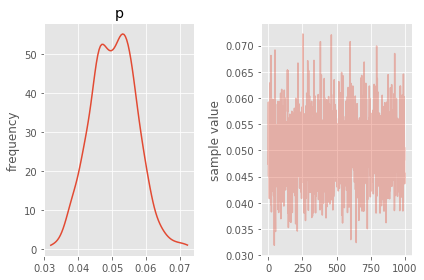

In [5]:
A_fit.plot('p');
plt.tight_layout()

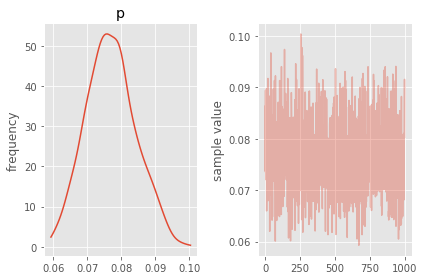

In [6]:
B_fit.plot('p');
plt.tight_layout()

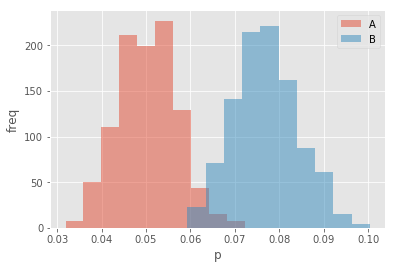

In [7]:
A_pos = A_fit.extract('p')['p']
B_pos = B_fit.extract('p')['p']
plt.hist(A_pos, alpha=0.5, label='A')
plt.hist(B_pos, alpha=0.5, label='B')
plt.xlabel('p')
plt.ylabel('freq')
plt.legend(loc='upper right')

In [8]:
np.sum(A_pos < B_pos) / A_pos.size # probability of p_B > p_A

0.998

In [90]:
# Hierarchical Model

hierarchical_hits_code = """
data {
    int<lower=1> N; // number of variants
    int<lower=0> visits[N]; // number of visits
    int<lower=0> hits[N]; // number of hits
}

transformed data{}

parameters {
    real<lower=0> a; // lower parameter of the beta distribution
    real<lower=0> b; // upper parameter of the beta distribution
    real<lower=0, upper=1> p[N]; // probability of hits
}

transformed parameters{}

model {
    //a ~ beta(2, 2);
    //b ~ beta(2, 2);
    target += -5/2*log(a+b);
    p ~ beta(a, b);
    for (i in 1:N)
        hits[i] ~ binomial(visits[i], p[i]);
}

generated quantities {}
"""

hierarchical_data = {
    'N': 10,
    'visits': 100*np.ones(10, dtype=np.int),
    'hits': [40, 44, 47, 54, 63, 46, 44, 49, 58, 50],
}

fit = pystan.stan(model_code=hierarchical_hits_code, data=hierarchical_data, iter=500000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3e7b486151e028c86be72dbd506c791a NOW.


In [91]:
print(fit)

Inference for Stan model: anon_model_3e7b486151e028c86be72dbd506c791a.
1 chains, each with iter=500000; warmup=250000; thin=1; 
post-warmup draws per chain=250000, total post-warmup draws=250000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a    172.04   18.89 214.59  11.92  37.04  78.04 209.01 801.02    129    1.0
b    175.41   19.22 218.26  12.16  37.78   79.6 213.08 807.59    129    1.0
p[0]   0.46  1.2e-3   0.04   0.37   0.43   0.46   0.49   0.52   1009    1.0
p[1]   0.47  7.8e-4   0.04    0.4   0.45   0.48    0.5   0.54   2071    1.0
p[2]   0.49  4.7e-4   0.03   0.41   0.46   0.49   0.51   0.55   5212    1.0
p[3]   0.51  6.3e-4   0.03   0.45   0.49   0.51   0.53   0.59   3032    1.0
p[4]   0.55  1.6e-3   0.04   0.48   0.51   0.54   0.58   0.65    813    1.0
p[5]   0.48  6.8e-4   0.03   0.41   0.46   0.48    0.5   0.54   2569    1.0
p[6]   0.47  7.8e-4   0.04    0.4   0.45   0.48    0.5   0.54   2072    1.0
p[7]   0.49  4.3e-4   0.03   0.42   0.47   

Inference for Stan model: anon_model_8afa92c554f0634af7924dc6db88826f.
1 chains, each with iter=500000; warmup=250000; thin=1; 
post-warmup draws per chain=250000, total post-warmup draws=250000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.62  1.4e-4   0.05   0.53   0.59   0.63   0.66   0.71 113697    1.0
lp__  -69.3  1.9e-3   0.71 -71.33 -69.47 -69.03 -68.85  -68.8 134978    1.0

Samples were drawn using NUTS at Sun Mar 19 20:47:09 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
0.624696564799
0.548044812143


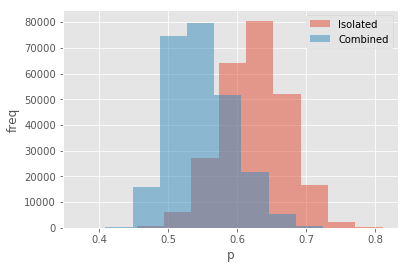

In [93]:
idx = 4

isolated_data = {
    'visits': hierarchical_data['visits'][idx],
    'hits': hierarchical_data['hits'][idx],
}

isolated_fit = pystan.stan(fit=A_fit, data=isolated_data, iter=500000, chains=1)

print(isolated_fit)

pos1 = isolated_fit.extract('p')['p']
pos2 = fit.extract('p')['p'][:, idx]

print(pos1.mean())
print(pos2.mean())

plt.hist(pos1, alpha=0.5, label='Isolated')
plt.hist(pos2, alpha=0.5, label='Combined')
plt.xlabel('p')
plt.ylabel('freq')
plt.legend(loc='upper right')